### 评分卡模型开发步骤：
- Step1，数据获取，包括获取存量客户及潜在客户的数据
存量客户，已开展融资业务的客户，包括个人客户和机构客户；
潜在客户，将要开展业务的客户
- Step2，EDA，获取样本整体情况，进行直方图、箱形图可视化
- Step3，数据预处理，包括数据清洗、缺失值处理、异常值处理
- Step4，变量筛选，通过统计学的方法，筛选出对违约状态影响最显著的指标。主要有单变量特征选择和基于机器学习的方法
- Step5，模型开发，包括变量分段、变量的WOE（证据权重）变换和逻辑回归估算三个部分
- Step6，模型评估，评估模型的区分能力、预测能力、稳定性，并形成模型评估报告，得出模型是否可以使用的结论
- Step7，生成评分卡（信用评分），根据逻辑回归的系数和WOE等确定信用评分的方法，将Logistic模型转换为标准评分的形式
- Step8，建立评分系统（布置上线），根据生成的评分卡，建立自动信用评分系统

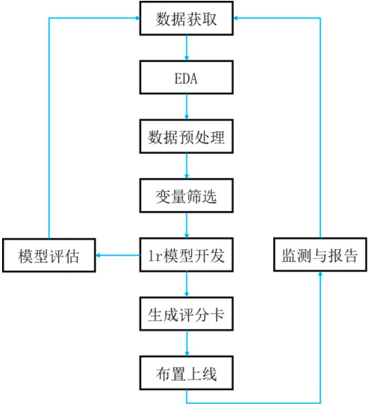

Project：基于评分卡的风控模型开发
数据集GiveMeSomeCredit，15万样本数据
https://www.kaggle.com/c/GiveMeSomeCredit/data
1. 基本属性：包括了借款人当时的年龄
- 偿债能力：包括了借款人的月收入、负债比率
- 信用往来：两年内35-59天逾期次数、两年内60-89天逾期次数、两年内90天或高于90天逾期的次数
- 财产状况：包括了开放式信贷和贷款数量、不动产贷款或额度数量。
- 其他因素：包括了借款人的家属数量
- 时间窗口：自变量的观察窗口为过去两年，因变量表现窗口为未来两年

### 基于评分卡的风控模型开发

- Step1，数据探索性分析
违约率分析
缺失值分析
对于某个字段的统计分析（比如RevolvingUtilizationOfUnsecuredLines）
- Step2，数据缺失值填充，采用简单规则，如使用中位数进行填充
- Step3，变量分箱
1）对于age字段，分成6段 [-math.inf, 25, 40, 50, 60, 70, math.inf]
2）对于NumberOfDependents（家属人数）字段，分成6段
[-math.inf,2,4,6,8,10,math.inf]
3）对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段
[-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
4）对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段
- Step4，特征筛选
使用IV值衡量自变量的预测能力，筛选IV值>0.1的特征字段
- Step5，对于筛选出来的特征，计算每个bin的WOE值
- Step6，使用逻辑回归进行建模
训练集、测试集切分
计算LR的准确率
- Step7，评分卡模型转换
设p为客户违约的概率，那么正常的概率为1-p

### 各个特征的woe值作为特征

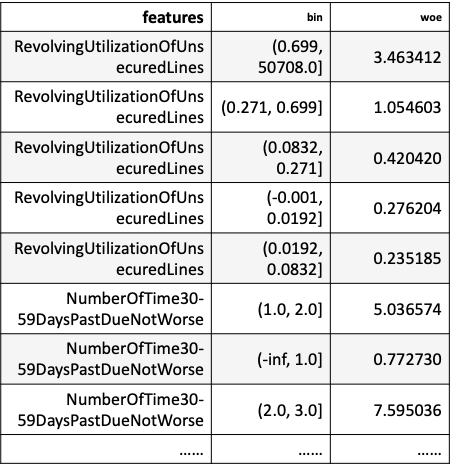

In [1]:
import pandas as pd
# 数据加载
df_train = pd.read_csv('cs-training.csv')
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 字段说明
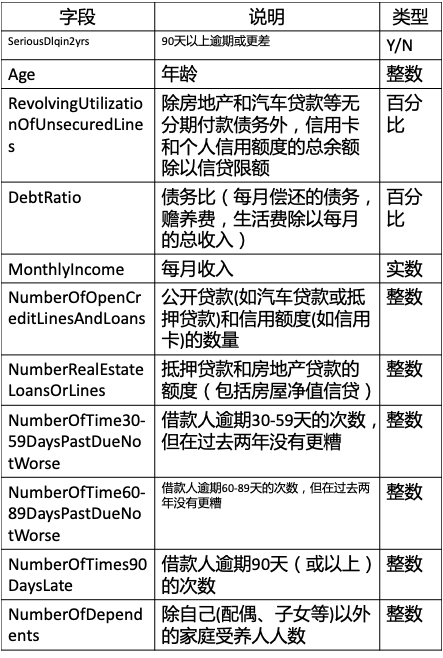

In [2]:
#去掉第一列
df_train = df_train.iloc[:,1:]
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df_train.shape

(150000, 11)

In [4]:
#标签列频数统计
df_train['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

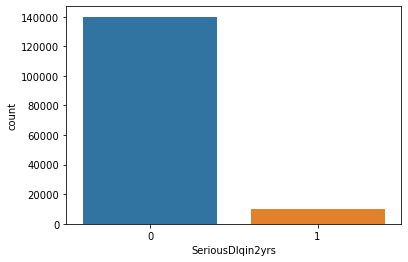

In [5]:
# 对标签列进行可视化
import seaborn as sns
sns.countplot(x='SeriousDlqin2yrs',data=df_train)

In [6]:
# 求0和1的比例，01分布极不平衡
df_train['SeriousDlqin2yrs'].sum()/len(df_train)

0.06684

In [7]:
#缺失值情况
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

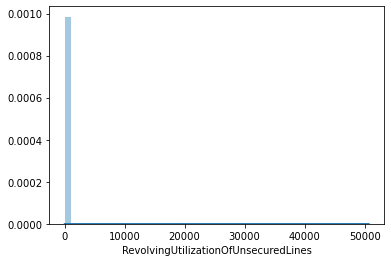

In [8]:
# 直方图分布
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

In [9]:
# 使用中位数的方式填充缺失值
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [10]:
# 数据分箱
import math

# 将age字段进行分箱
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['bin_age'] = pd.cut(df_train['age'],bins=age_bins)
df_train[['age','bin_age']]

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [11]:
#对于NumberOfDependents字段的分箱
dependents_bins = [-math.inf, 2, 4, 6, 8, 10, math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train['NumberOfDependents'],bins=dependents_bins)
df_train[['NumberOfDependents','bin_NumberOfDependents']]

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [12]:
# 对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'],bins=dpd_bins)
df_train[['NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse',\
         'bin_NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate','bin_NumberOfTimes90DaysLate']]

,NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,bin_NumberOfTimes90DaysLate
0,2,"(1.0, 2.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
1,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
2,1,"(-inf, 1.0]",0,"(-inf, 1.0]",1,"(-inf, 1.0]"
3,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
4,1,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
...,...,...,...,...,...,...
149995,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149996,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149997,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149998,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"


In [13]:
df_train['NumberRealEstateLoansOrLines'].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
25        3
18        2
19        2
20        2
23        2
32        1
21        1
26        1
29        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [14]:
# 对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段
df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop')
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop')
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop')
loans_bins = [-math.inf,0,1,2,3,math.inf]
df_train['bin_NumberRealEstateLoansOrLines'] = pd.cut(df_train['NumberRealEstateLoansOrLines'],bins=loans_bins)
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"


In [15]:
df_train['bin_NumberRealEstateLoansOrLines'].value_counts() 

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, 3.0]      6300
(3.0, inf]      3652
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

In [16]:
# 统计分箱字段
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

In [17]:
import numpy as np

# 计算IV，衡量变量的预测能力
def cal_IV(df,feature,target):
    lst = []
    cols = ['Variable','Value','All','Bad']
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,val,df[df[feature]==val].count()[feature],\
                   df[(df[feature]==val) & (df[target]==1)].count()[feature]])

    data = pd.DataFrame(lst,columns=cols)
    data = data[data['Bad'] > 0]
    
    data['Share'] = data['All'] / data['All'].sum() 
    data['Bad Rate'] = data['Bad'] / data['All'] 
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum()
    data['Margin Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['woe'] = np.log(data['Margin Bad'] / data['Margin Good'])
    data['iv'] = (data['woe'] * (data['Margin Bad'] - data['Margin Good'])).sum()
    data.sort_values(by = ['Variable','Value'])
    return data['iv'].values[0]

cal_IV(df_train,'bin_age','SeriousDlqin2yrs')

0.24041120302785982

In [18]:
#将每个字段的IV值计算出来
for f in bin_cols:
    if cal_IV(df_train,f,'SeriousDlqin2yrs') >= 0.1:
        print(f,cal_IV(df_train,f,'SeriousDlqin2yrs'))

bin_age 0.24041120302785982
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887


In [19]:
feature_cols = ['bin_age','bin_NumberOfTime30-59DaysPastDueNotWorse',\
                'bin_NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate',\
               'bin_RevolvingUtilizationOfUnsecuredLines']

In [20]:
def cal_WOE(df,features,target):
    df_new = df.copy()
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join,df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns={target+'sum':'bad',target+'count':'all'})

        df_woe['good'] = df_woe['all'] - df_woe['bad']
        df_woe['margin bad'] = df_woe['bad'] / df_woe['bad'].sum()
        df_woe['margin good'] = df_woe['good'] / df_woe['good'].sum()
        df_woe['woe'] = np.log1p(df_woe['margin bad'] / df_woe['margin good'])
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe,on=f,how='left')
    return df_new

# 计算这些特征的woe
df_woe = cal_WOE(df_train,bin_cols,'SeriousDlqin2yrs')

In [21]:
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfOpenCreditLinesAndLoans,margin bad_bin_NumberOfOpenCreditLinesAndLoans,margin good_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,25838,0.184121,0.184591,0.691873,419,3652,3233,0.041791,0.023097,1.032961
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,24972,0.156892,0.178405,0.630962,4672,56188,51516,0.465988,0.368040,0.818076
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,35145,0.201177,0.251082,0.588475,2748,52338,49590,0.274087,0.354280,0.573037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,2748,52338,49590,0.274087,0.354280,0.573037
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,2748,52338,49590,0.274087,0.354280,0.573037
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,25838,0.184121,0.184591,0.691873,2748,52338,49590,0.274087,0.354280,0.573037
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076


In [22]:
# 得到WOE的规则
feature_columns = ['age','NumberOfTime30-59DaysPastDueNotWorse',\
                'NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate',\
               'RevolvingUtilizationOfUnsecuredLines']

df_bin_to_woe = pd.DataFrame(columns=['features','bin','woe'])
for f in feature_columns:
    b = 'bin_' + f
    w = 'woe_bin_' + f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])
df_bin_to_woe.head()

,features,bin,woe
0,age,"(40.0, 50.0]",0.813822
1,age,"(25.0, 40.0]",0.955231
5,age,"(70.0, inf]",0.279404
6,age,"(50.0, 60.0]",0.651655
15,age,"(60.0, 70.0]",0.406848


In [23]:
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
woe_cols

['woe_bin_age',
 'woe_bin_NumberOfDependents',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans',
 'woe_bin_NumberRealEstateLoansOrLines']

In [24]:
df_woe[woe_cols]

,woe_bin_age,woe_bin_NumberOfDependents,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_NumberOfTime60-89DaysPastDueNotWorse,woe_bin_NumberOfTimes90DaysLate,woe_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_DebtRatio,woe_bin_MonthlyIncome,woe_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberRealEstateLoansOrLines
0,0.813822,0.67296,1.797837,0.645352,0.608707,1.495914,0.928274,0.516960,0.691873,1.032961
1,0.955231,0.67296,0.572521,0.645352,0.608707,1.495914,0.645506,0.882076,0.882845,0.818076
2,0.955231,0.67296,0.572521,0.645352,0.608707,0.720083,0.645506,0.882076,0.882845,0.818076
3,0.955231,0.67296,0.572521,0.645352,0.608707,0.350952,0.645506,0.882076,0.630962,0.818076
4,0.813822,0.67296,0.572521,0.645352,0.608707,1.495914,0.645506,0.516960,0.588475,0.573037
...,...,...,...,...,...,...,...,...,...,...
149995,0.279404,0.67296,0.572521,0.645352,0.608707,0.211221,0.613576,0.882076,0.882845,0.573037
149996,0.813822,0.67296,0.572521,0.645352,0.608707,0.720083,0.928274,0.643114,0.882845,0.573037
149997,0.651655,0.67296,0.572521,0.645352,0.608707,0.350952,0.597328,0.698081,0.691873,0.573037
149998,0.955231,0.67296,0.572521,0.645352,0.608707,0.243890,0.645506,0.643114,0.882845,0.818076


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

# 逻辑回归模型
x_train,x_test,y_train,y_test = train_test_split(df_woe[woe_cols],df_woe['SeriousDlqin2yrs'],test_size=0.2,random_state = 1234)

In [26]:
df_woe.shape

(150000, 81)

In [27]:
model = LogisticRegression(random_state=1234).fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(roc_auc_score(y_pred,y_test))

0.9359666666666666
0.7630527415671403


In [28]:
from imblearn.over_sampling import SMOTE,SVMSMOTE,KMeansSMOTE

over_samples = SVMSMOTE(random_state=1234) 
over_samples_x,over_samples_y = over_samples.fit_sample(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'])

In [29]:
over_samples_x.shape

(279948, 10)

In [30]:
for i in woe_cols:
    # 重抽样前的类别比例
    print('平衡前正负样本数量：\n',df_woe[i].value_counts()/len(df_woe[i]))
# 重抽样后的类别比例
print('平衡后正负样本数量：\n',pd.Series(over_samples_y).value_counts()/len(over_samples_y))

平衡前正负样本数量：
 0.813822    0.233580
0.651655    0.232040
0.955231    0.213793
0.406848    0.182827
0.279404    0.117573
1.013134    0.020187
Name: woe_bin_age, dtype: float64
平衡前正负样本数量：
 0.672960    0.911093
0.880529    0.082300
0.948487    0.006027
0.890838    0.000500
0.000000    0.000080
Name: woe_bin_NumberOfDependents, dtype: float64
平衡前正负样本数量：
 0.572521    0.947007
1.797837    0.030653
2.151185    0.011693
2.429111    0.004980
2.520613    0.002280
2.902860    0.001847
2.812612    0.000933
2.774776    0.000360
2.024184    0.000167
2.077007    0.000080
Name: woe_bin_NumberOfTime30-59DaysPastDueNotWorse, dtype: float64
平衡前正负样本数量：
 0.645352    0.987513
2.712133    0.007453
2.955438    0.002120
2.886833    0.001800
3.164917    0.000700
3.159234    0.000227
3.758483    0.000107
2.915139    0.000060
2.705454    0.000013
0.000000    0.000007
Name: woe_bin_NumberOfTime60-89DaysPastDueNotWorse, dtype: float64
平衡前正负样本数量：
 0.608707    0.979367
2.701853    0.010367
2.998746    0.004447
2.878935 

In [31]:
#对平衡后的样本重新进行计算
x_train_smote,x_test_smote,y_train_smote,y_test_smote = train_test_split(over_samples_x,over_samples_y,test_size=0.2,random_state = 1234)
model2 = LogisticRegression(random_state=1234).fit(x_train_smote,y_train_smote)
y_pred2 = model2.predict(x_test_smote)
print(accuracy_score(y_pred2,y_test_smote))
print(roc_auc_score(y_pred2,y_test_smote))

0.8185747454902661
0.8186172210493224


In [32]:
# 运用KMeansSMOTE算法实现训练数据集的平衡
over_samples2 = KMeansSMOTE(random_state=1234) 
over_samples_x2,over_samples_y2 = over_samples2.fit_sample(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'])

for i in woe_cols:
    # 重抽样前的类别比例
    print('平衡前正负样本数量：\n',df_woe[i].value_counts()/len(df_woe[i]))
# 重抽样后的类别比例
print('平衡后正负样本数量：\n',pd.Series(over_samples_y2).value_counts()/len(over_samples_y2))

平衡前正负样本数量：
 0.813822    0.233580
0.651655    0.232040
0.955231    0.213793
0.406848    0.182827
0.279404    0.117573
1.013134    0.020187
Name: woe_bin_age, dtype: float64
平衡前正负样本数量：
 0.672960    0.911093
0.880529    0.082300
0.948487    0.006027
0.890838    0.000500
0.000000    0.000080
Name: woe_bin_NumberOfDependents, dtype: float64
平衡前正负样本数量：
 0.572521    0.947007
1.797837    0.030653
2.151185    0.011693
2.429111    0.004980
2.520613    0.002280
2.902860    0.001847
2.812612    0.000933
2.774776    0.000360
2.024184    0.000167
2.077007    0.000080
Name: woe_bin_NumberOfTime30-59DaysPastDueNotWorse, dtype: float64
平衡前正负样本数量：
 0.645352    0.987513
2.712133    0.007453
2.955438    0.002120
2.886833    0.001800
3.164917    0.000700
3.159234    0.000227
3.758483    0.000107
2.915139    0.000060
2.705454    0.000013
0.000000    0.000007
Name: woe_bin_NumberOfTime60-89DaysPastDueNotWorse, dtype: float64
平衡前正负样本数量：
 0.608707    0.979367
2.701853    0.010367
2.998746    0.004447
2.878935 

In [33]:
#对平衡后的样本重新进行计算
x_train_smote2,x_test_smote2,y_train_smote2,y_test_smote2 = train_test_split(over_samples_x2,over_samples_y2,test_size=0.2,random_state = 1234)
model3 = LogisticRegression(random_state=1234).fit(x_train_smote2,y_train_smote2)
y_pred3 = model3.predict(x_test_smote2)
print(accuracy_score(y_pred3,y_test_smote2))
print(roc_auc_score(y_pred3,y_test_smote2))

0.9640828719414181
0.964953992315716


### 综上：KMeansSMOTE的效果最好

In [34]:
# PDO = 50,B = 72.13
A, B = 650 ,72.13
# 生成评分卡模型
def generate_scorecard(model_coef,binning_df,features,B):
    cols = ['Variable','Binning','Score']
    #模型系数
    coef = model_coef[0]
    # print(coef)
    lst = []
    for i in range(len(features)):
        f = features[i]
        # print(f)
        # 得到feature的woe规则
        df = binning_df[binning_df['features']==f]
        # print(df)
        for index,row in df.iterrows():
            score = int(round(-coef[i] * row['woe'] * B))
            lst.append([f,row['bin'],score])
    data = pd.DataFrame(lst,columns=cols)
    return data
            
        
score_card = generate_scorecard(model3.coef_,df_bin_to_woe,feature_columns,B)
score_card.head()

,Variable,Binning,Score
0,age,"(40.0, 50.0]",-56
1,age,"(25.0, 40.0]",-66
2,age,"(70.0, inf]",-19
3,age,"(50.0, 60.0]",-45
4,age,"(60.0, 70.0]",-28


In [35]:
# 对每个字段按照分数降序排序，查看规则
sort_scorecard = score_card.groupby('Variable').apply(lambda x:x.sort_values('Score',ascending=False))
sort_scorecard

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 7   NumberOfTime30-59DaysPastDueNotWorse   
                                     6   NumberOfTime30-59DaysPastDueNotWorse   
                                     14  NumberOfTime30-59DaysPastDueNotWorse   
                                     15  NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     10  NumberOfTime30-59DaysPastDueNotWorse   
                                     11  NumberOfTime30-59DaysPastDueNotWorse   
                                     13  NumberOfTime30-59DaysPastDueNotWorse   
                                     12  NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 25  NumberOfTime60-89DaysPastDueNotWorse   
                                     16  NumberOfTime60-89DaysPastDueNotWorse   
                                     24  NumberOfTime60-89DaysPastDueNotWorse   
                                     17  NumberOfTime60-89DaysPastDueNotWorse   
                                     20  NumberOfTime60-89DaysPastDueNotWorse   
                                     23  NumberOfTime60-89DaysPastDueNotWorse   
                                     19  NumberOfTime60-89DaysPastDueNotWorse   
                                     18  NumberOfTime60-89DaysPastDueNotWorse   
                                     21  NumberOfTime60-89DaysPastDueNotWorse   
                                     22  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              26               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
                                     31               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     33               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
                                     30               NumberOfTimes90DaysLate   
                                     35               NumberOfTimes90DaysLate   
                                     32               NumberOfTimes90DaysLate   
                                     34               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 40  RevolvingUtilizationOfUnsecuredLines   
                                     39  RevolvingUtilizationOfUnsecuredLines   
                                     38  RevolvingUtilizationOfUnsecuredLines   
                                     37  RevolvingUtilizationOfUnsecuredLines   
                                     36  RevolvingUtilizationOfUnsecuredLines   
age                                  2                                    age   
                                     4                                    age   
                                     3                                    age   
                                     0                                    age   
                                     1                                    age   
                                     5                                    age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 7        (-inf, 1.0]    -34  
                                     6         (1.0, 2.0]   -108  
                                     14        (7.0, 8.0]   -121  
                                     15        (8.0, 9.0]   -125  
                                     8         (2.0, 3.0]   -129  
                                     9         (3.0, 4.0]   -146  
                                     10        (4

In [36]:
# 将字符转化为数值
def str_to_int(s):
    if s == '-inf':
        return -999999
    if s == 'inf':
        return 999999
    return float(s)
    

# 将value映射到bin
def map_value_to_bin(feature_value,feature_to_bin):
    for index,row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        # print('bins',bins)
        left_open = bins[0] == '('
        # print('left_open',left_open)
        right_open = bins[-1] == ')'#如果右侧为]，right_open = 0
        # print('right_open',right_open)
        binnings = bins[1:-1].split(',')
        # print('binnings',binnings)
        in_range = True
        if left_open:
            if feature_value <= str_to_int(binnings[0]):
                in_range = False
        else:
            if feature_value < str_to_int(binnings[0]):
                in_range = False
        # 检查右括号
        if right_open:
            if feature_value >= str_to_int(binnings[1]):
                in_range = False
        else:
            if feature_value > str_to_int(binnings[1]):
                in_range = False
        if in_range:
            return row['Binning']
    return null
            
# 通过评分卡规则score_card转换为分数
def map_to_score(df,score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        feature_to_bin = score_card[score_card['Variable']==col]
        feature_value = df[col]
        selected_bin = map_value_to_bin(feature_value,feature_to_bin)
        selected_record_in_scorecard = feature_to_bin[feature_to_bin['Binning']==selected_bin]
        score = score + selected_record_in_scorecard['Score'].iloc[0]
    return score
        
# 使用评分卡模型计算分数
def calculate_score_with_card(df,score_card,A):
    df['score'] = df.apply(map_to_score,args=(score_card,),axis=1)
    df['score'] += A
    df['score'] = df['score'].astype(int)
    return df

In [37]:
# 随机选择good的5个人
good_sample = df_train[df_train['SeriousDlqin2yrs']==0].sample(5)
# good_sample
good_sample = good_sample[feature_columns]
# 应用评分卡，对sample计算分数
calculate_score_with_card(good_sample,score_card,A)

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,score
62340,29,0,0,0,0.564844,361
67286,57,0,0,0,0.944826,282
94040,85,0,0,0,0.004909,469
19926,41,0,0,0,0.231551,418
149184,54,0,0,0,0.149382,429


In [38]:
# 随机选择bad的5个人
bad_sample = df_train[df_train['SeriousDlqin2yrs']==1].sample(5)
# bad_sample
bad_sample = bad_sample[feature_columns]
# 应用评分卡，对sample计算分数
calculate_score_with_card(bad_sample,score_card,A)

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,score
55022,47,0,2,2,1.000000,-56
67196,24,0,0,1,1.000000,257
98725,41,0,0,0,1.000000,271
69547,51,0,1,1,0.056503,447
98582,44,3,0,1,0.933672,176
